In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
class CalculadoraPeriodo:
  def monto(self, capital, tasa, plazo):
    return capital * (1 + tasa*plazo/365)

  def balance(self, capital, tasa, periodo, plazo, aporte):
    if np.mod(periodo, plazo) == 0:
      balance = self.monto(capital, tasa, plazo)
      if np.mod(periodo, 30) == 0:
        balance = balance + aporte
    else:
      balance = capital
    
    return balance

  def generar_df(self, capital, tasa, plazo, aporte, clase: str):
    data = [[0, capital, 0, clase]]
    balance = capital
    acum_aportes = aporte

    for i in range(1, 365):
      balance = self.balance(balance, tasa, i, plazo, aporte)
      if np.mod(i, 30) == 0:
        acum_aportes += aporte

      data.append([i, balance, acum_aportes, clase])
    
    return pd.DataFrame(data, columns=['Periodo', 'Balance', 'Aporte', 'Inversion'])

In [32]:
def graph(lista_df):
    fig, ax = plt.subplots(figsize=(15, 10))
    clases = []

    for df in lista_df:
      plt.plot(df['Periodo'], df['Balance'])
      clases.append(pd.unique(df['Inversion']))
      plt.plot(df['Periodo'], df['Aporte'])
      clases.append('Aporte' + pd.unique(df['Inversion']))
    
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    plt.legend(clases, ncol=4)
    plt.xlabel('Periodos', size=14, labelpad=20)
    plt.ylabel('Balances y aportes', size=14, labelpad=20)

In [33]:
# P = 1000
# R = 2000
# r = 0.0354
# n = 12
# t = 1

lista_df = []
#calculadora = Calculadora()
calculadora_mensual = CalculadoraPeriodo()

def plazo_fijo():
  #return calculadora.generar_df(P=4000, R=4000, r=0.04, n=12, t=2)
  return calculadora_mensual.generar_df(20000, 0.48, 30, 5000, 'Plazo fijo')

def fci():
  #return calculadora.generar_df(P=4000, R=4000, r=0.00354, n=12, t=2)
  return calculadora_mensual.generar_df(20000, 0.37, 1, 10000, 'FCI')

lista_df.append(plazo_fijo())
lista_df.append(fci())


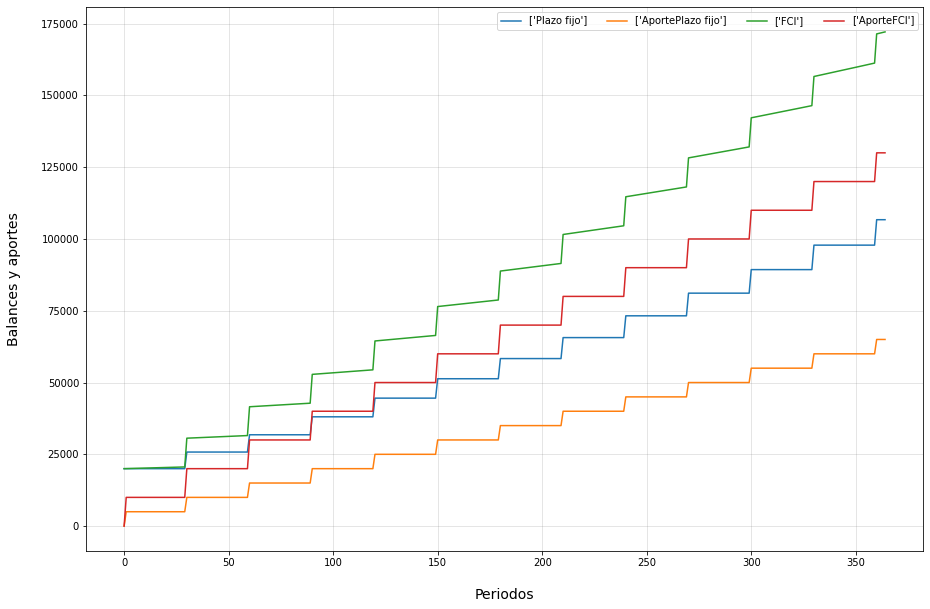

In [34]:
graph(lista_df)

In [35]:
# https://a2-finance.com/es/calculators/todas-las-calculadoras/calculadora-de-interes-compuesto

# Los cálculos hechos son para obtener la convergencia de las series. Lo que se busca
# graficar en realidad es la serie. 
class Calculadora:
  def monto(self, P, r, n, t):
    return P * (1 + r/n)**(n*t)

  def aporte(self, R, r, n, t):
    return R * ((1 + r/n)**(n*t) - 1)/(r/n)

  def f(self, P, R, r, n, t):
    return self.monto(P, r, n, t) + self.aporte(R, r, n, t)

  def generar_df(self, P, R, r, n, t):
    data = [[0, P]]

    for i in range(1, n+1):
      balance = self.f(P, R, r, i, t) 
      data.append([i, balance])

    return pd.DataFrame(data, columns=['Mes', 'Balance'])

  def graph(self, lista_df):
    fig, ax = plt.subplots(figsize=(15, 10))

    for df in lista_df:
      plt.plot(df['Mes'], df['Balance'])
    
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    #plt.legend()
    plt.xlabel('Meses', size=14, labelpad=20)
    plt.ylabel('Balances', size=14, labelpad=20)